# The KPMG Bicycle Problem
A classic example of customer segmentaion analysis.
> This is a part of the KPMG Job Simulation Program, it used to be availible [the forage](https://www.theforage.com/) but is archived now.

> This notebook is a summary and updated version of the past three notebooks I've created before which can be visited here:
> - [Task 1](https://www.kaggle.com/code/notcostheta/kpmg-virtual-internship-task1)
> - [Task 2](https://www.kaggle.com/code/notcostheta/kpmg-virtual-internship-task2)
> - [Task 3](https://www.kaggle.com/code/notcostheta/kpmg-virtual-internship-task3)

## Background :

Apparently I’m finally working at KPMG (please hire me) and I just got my first client, it’s a medium-sized bikes and cycling accessories company, Sprocket Central Pty Ltd.

Me along with my Analytics, Information and modelling team are supposed to help them skyrocket their business 📈👌

They provided me with three datasets:

- Customer Demographic
- Customer Addresses
- Transactions data in the past 3 months

But there are issues with their data, of course, it can not be used to build some magical model right away, also my Associate Director suggested that I should optimise the quality of the customer data before deriving any kind of insights for the company growth. 

Which brings us towards our first task !

# Task 1 : Data Quality Assessment
Fix the issues we encounter in all three datasets, and draft an email to the client identifying the data quality issues and ways to mitigate them.

At the end of this task, we would have it cleaned, made it accurate and consistent, and ready to be used for our analysis.


### Data Quality Framework

| Framework   | Description                                                                                      |
|-------------|--------------------------------------------------------------------------------------------------|
| Accuracy    | The closeness between a value to its correct representation of the real-life phenomenon          |
| Completeness| The extent to which data are of sufficient breadth, depth, and scope for the task at hand        |
| Consistency | The extent to which data are uniform in format, use, and meaning across a data collection        |
| Currency    | The freshness of data                                                                           |
| Volatility  | The length of time the data remains valid                                                       |
| Relevancy   | The extent to which data are appropriate for the task at hand                                   |
| Validity    | The extent to which data conform to defined business rules or constraints                       |
| Uniqueness  | The extent to which data are unique within the dataset                                          |


## Importing the data
We will be using pandas libraries to import the data and perform our analysis.
You can also use excel or google sheets and whatever tools you're comfortable with.


In [75]:
# Importing the libraries
import numpy as np
import pandas as pd

# Importing the dataset
xls = pd.ExcelFile(
    "/home/meow/Desktop/internship-speedrun/kpmg/KPMG_VI_New_raw_data_update_final.xlsx"
)

# I'm using black formatting for the code
# Keep note of the naming convention
# We used PascalCase to name all out original datasets

Transactions = pd.read_excel(xls, "Transactions", skiprows=1)
CustomerDemographic = pd.read_excel(xls, "CustomerDemographic", skiprows=1)
CustomerAddress = pd.read_excel(xls, "CustomerAddress", skiprows=1)
NewCustomerList = pd.read_excel(xls, "NewCustomerList", skiprows=1)

## Analyzing the dataframes
We will analyze the dataframes and see what issues we can find in them.
- Shape and Cardinality
- Missing Values
- Duplicates
- Data Types

Solutions and mitigation strategies are available at the end of each section.

### Analysing Transactions Data

#### Shape and Cardinality
- Shape of the data is 20000 rows and 13 columns
- Columns with cardinality 2 should be converted to boolean
- This would be useful for non machine learning approaches

In [76]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [77]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [78]:
# List unique values of all the columns with ascending order of cardinality
# Cardinality is the number of unique values in a column
# This is a good way to check for categorical columns

for col in Transactions.columns:
    print(f"{col}: {Transactions[col].nunique()}")

print("------------------------------------")

# Print top 7 unique values of all the columns with ascending order of cardinality if less than 7
for col in Transactions.columns:
    if Transactions[col].nunique() < 10:
        print(f"{col}: {Transactions[col].unique()}")

transaction_id: 20000
product_id: 101
customer_id: 3494
transaction_date: 364
online_order: 2
order_status: 2
brand: 6
product_line: 4
product_class: 3
product_size: 3
list_price: 296
standard_cost: 103
product_first_sold_date: 100
------------------------------------
online_order: [ 0.  1. nan]
order_status: ['Approved' 'Cancelled']
brand: ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
product_line: ['Standard' 'Road' 'Mountain' 'Touring' nan]
product_class: ['medium' 'low' 'high' nan]
product_size: ['medium' 'large' 'small' nan]


#### Missing Values and Duplicate Rows
- The number of missing values in this dataframe are insignificant and from the same rows, we can drop them.
- There are no duplicate rows

In [79]:
# Function to analyse the missing data


def analyze_null_values(dataframe):
    total_null_values = dataframe.isnull().sum()
    total_values = dataframe.count().sort_values(ascending=True)
    null_values_percentage = (total_null_values / total_values) * 100
    missing_data = pd.concat(
        {
            "Null Values": total_null_values,
            "Percentage of Missing Values": null_values_percentage,
            "Total Values": total_values,
        },
        axis=1,
    )

    missing_data = missing_data.sort_values(
        by="Percentage of Missing Values", ascending=False
    )

    return missing_data


analyze_null_values(Transactions)

,Null Values,Percentage of Missing Values,Total Values
online_order,360,1.832994,19640
brand,197,0.994799,19803
product_line,197,0.994799,19803
product_class,197,0.994799,19803
product_size,197,0.994799,19803
standard_cost,197,0.994799,19803
product_first_sold_date,197,0.994799,19803
transaction_id,0,0.000000,20000
product_id,0,0.000000,20000
customer_id,0,0.000000,20000


In [80]:
# Show the number of duplicated rows
Transactions.duplicated().sum()

0

#### Date Time Adjustments
- `transaction_date` should be converted to datetime format
- `product_first_sold_date` should be converted to datetime format
- we will later make a new `product_age` column by converting the `product_first_sold_date` to datetime format and subtracting it from the `today_date`

In [81]:
# Define start and end date of the dataset
start_date = pd.to_datetime("2017-01-01")
end_date = pd.to_datetime("2017-12-31")

# Convert transaction_date column to standard datetime format
Transactions["transaction_date"] = pd.to_datetime(Transactions["transaction_date"])

# Convert product_first_sold_date column to standard datetime format
# We need to add the timedelta to the date because the date is stored as a number of days since 1900-01-01
# Assuming the dataset was given to us on 2018-01-01

today_date = pd.Timestamp("2018-01-01")
Transactions["product_first_sold_date"] = pd.to_timedelta(
    Transactions["product_first_sold_date"], unit="D"
) + pd.Timestamp("1900-01-01")

date_difference = pd.Timestamp.today() - today_date
Transactions["product_first_sold_date"] = (
    Transactions["product_first_sold_date"] - date_difference
)

In [82]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

### Fixing the Transactions Data
- We already fixed the date time format earlier
- We will convert the `online_order` and `order_status` columns to object type and map them as True/False
- We have their datatype as object, even though they are boolean, because it'll be helpful for machine learning models
- Don't worry about the `NaN` values, pipelines will take care of them

In [83]:
# Mapping the online_order column to True and False
Transactions["online_order"] = Transactions["online_order"].map({1: True, 0: False})

# Mapping the order_status column to True and False
Transactions["order_status"] = Transactions["order_status"].map(
    {"Approved": True, "Cancelled": False}
)

# Print unique values of online_order and order_status columns
print("Unique values of online_order column:", Transactions["online_order"].unique())
print("Unique values of order_status column:", Transactions["order_status"].unique())

Unique values of online_order column: [False True nan]
Unique values of order_status column: [ True False]


### Analysing Customer Demographic Data

#### Shape and Cardinality
- Shape of the data is 4000 rows and 13 columns
- `owns_car` column should be converted to boolean
- `deceased_indicator` column should be converted to boolean
- `gender` column should be converted to boolean
- `default` column should be dropped as it has no legible data

In [84]:
CustomerDemographic.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [85]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [86]:
# List unique values of all the columns with ascending order of cardinality
# Cardinality is the number of unique values in a column
# This is a good way to check for categorical columns

for col in CustomerDemographic.columns:
    print(f"{col}: {CustomerDemographic[col].nunique()}")

print("------------------------------------")

# Print top 7 unique values of all the columns with ascending order of cardinality if less than 7
for col in CustomerDemographic.columns:
    if CustomerDemographic[col].nunique() < 10:
        print(f"{col}: {CustomerDemographic[col].unique()}")

customer_id: 4000
first_name: 3139
last_name: 3725
gender: 6
past_3_years_bike_related_purchases: 100
DOB: 3448
job_title: 195
job_industry_category: 9
wealth_segment: 3
deceased_indicator: 2
default: 90
owns_car: 2
tenure: 22
------------------------------------
gender: ['F' 'Male' 'Female' 'U' 'Femal' 'M']
job_industry_category: ['Health' 'Financial Services' 'Property' 'IT' nan 'Retail' 'Argiculture'
 'Manufacturing' 'Telecommunications' 'Entertainment']
wealth_segment: ['Mass Customer' 'Affluent Customer' 'High Net Worth']
deceased_indicator: ['N' 'Y']
owns_car: ['Yes' 'No']


#### Null Values and Duplicate Rows
- `job_title` has 506 missing values
- `job_industry_category` has 656 missing values
- `last_name` has 125 missing values this whole column can be dropped since it wont be useful for our analysis
- `default` has 3027 missing values this whole column can be dropped since it wont be useful for our analysis
- `tenure` has 87 missing values
- `DOB` has 87 missing values
- There are no duplicate rows

In [87]:
# Call the function to analyze the missing data

analyze_null_values(CustomerDemographic)

,Null Values,Percentage of Missing Values,Total Values
job_industry_category,656,19.617225,3344
job_title,506,14.481969,3494
default,302,8.166577,3698
last_name,125,3.225806,3875
DOB,87,2.223358,3913
tenure,87,2.223358,3913
customer_id,0,0.000000,4000
first_name,0,0.000000,4000
gender,0,0.000000,4000
past_3_years_bike_related_purchases,0,0.000000,4000


In [88]:
# Show the number of duplicated rows
CustomerDemographic.duplicated().sum()

0

#### Date Time Adjustments
- `DOB` should be converted to datetime format
- `tenure` should be converted to integer format


In [89]:
# Convert DOB column to standard datetime format
CustomerDemographic["DOB"] = pd.to_datetime(CustomerDemographic["DOB"])
CustomerDemographic["tenure"] = CustomerDemographic["tenure"].astype("Int64")

### Fixing the Customer Demographic Data
- We already fixed the `DOB` and `tenure` columns earlier
- We will convert the `owns_car` and `deceased_indicator` columns to object type and map them as True/False
- We have their datatype as object, even though they are boolean, because it'll be helpful for machine learning models
- We will map the `gender` column to M and F and make it consistent

In [90]:
# Converting own_car column to True and False
CustomerDemographic["owns_car"] = CustomerDemographic["owns_car"].map(
    {"Yes": True, "No": False}
)

CustomerDemographic["owns_car"] = CustomerDemographic["owns_car"].astype("object")

# Converting deceased_indicator column to True and False
CustomerDemographic["deceased_indicator"] = CustomerDemographic[
    "deceased_indicator"
].map({"Y": True, "N": False})

CustomerDemographic['deceased_indicator'] = CustomerDemographic['deceased_indicator'].astype('object')

# Converting Gender column to M and F and U with np.nan
CustomerDemographic["gender"] = CustomerDemographic["gender"].replace("Female", "F")
CustomerDemographic["gender"] = CustomerDemographic["gender"].replace("Femal", "F")
CustomerDemographic["gender"] = CustomerDemographic["gender"].replace("Male", "M")
CustomerDemographic["gender"] = CustomerDemographic["gender"].replace("U", np.nan)

# Drop the default column
CustomerDemographic.drop(columns="default", inplace=True)

### Analysing Customer Address Data


#### Shape and Cardinality
- Shape of the data is 3999 rows and 6 columns
- `state` column needs to be mapped to State Initials

In [91]:
CustomerAddress.head(5)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [92]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [93]:
# Cardinailty of the columns
for col in CustomerAddress.columns:
    print(f"{col}: {CustomerAddress[col].nunique()}")
print("------------------------------------")

# Print top 7 unique values of all the columns with ascending order of cardinality if less than 7
for col in CustomerAddress.columns:
    if CustomerAddress[col].nunique() < 10:
        print(f"{col}: {CustomerAddress[col].unique()}")


customer_id: 3999
address: 3996
postcode: 873
state: 5
country: 1
property_valuation: 12
------------------------------------
state: ['New South Wales' 'QLD' 'VIC' 'NSW' 'Victoria']
country: ['Australia']


#### Missing Values and Duplicate Rows
- no missing values
- no duplicate rows

In [94]:
analyze_null_values(CustomerAddress)

,Null Values,Percentage of Missing Values,Total Values
customer_id,0,0.0,3999
address,0,0.0,3999
postcode,0,0.0,3999
state,0,0.0,3999
country,0,0.0,3999
property_valuation,0,0.0,3999


In [95]:
# Print the number of duplicated rows
CustomerAddress.duplicated().sum()

0

### Fixing the Customer Address Data
- There's no date time adjustments to be made
- We will map the `state` column to State Initials

In [96]:
# Mapping New South Wales to NSW and Victoria to VIC
CustomerAddress["state"] = CustomerAddress["state"].replace("New South Wales", "NSW")
CustomerAddress["state"] = CustomerAddress["state"].replace("Victoria", "VIC")

### Analysing New Customer List Data


#### Shape and Cardinality
- Shape of the data is 1000 rows and 23 columns
- `owns_car` column should be converted to boolean
- `deceased_indicator` column should be converted to boolean
- `gender` column should be converted to boolean
- `unnamed` columns should be dropped as it has no legible data

In [97]:
# Set max column display to None
pd.set_option("display.max_columns", None)

NewCustomerList.sample(5)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
946,Chryste,Oddboy,Female,44,1988-08-22,Software Engineer III,Manufacturing,High Net Worth,N,Yes,4,2115 Maryland Alley,2320,NSW,Australia,9,0.67,0.8375,1.046875,1.046875,947,947,0.459000
884,Raleigh,Pont,Male,48,1964-11-02,Associate Professor,Entertainment,Mass Customer,N,No,14,7650 Gulseth Parkway,3139,VIC,Australia,7,0.58,0.5800,0.580000,0.493000,883,883,0.531250
591,Rochette,Haddacks,Female,44,1996-05-10,Tax Accountant,Retail,Affluent Customer,N,Yes,13,822 Di Loreto Junction,3020,VIC,Australia,8,0.56,0.7000,0.700000,0.700000,591,591,0.782000
297,Geoff,Sitford,Male,97,1965-02-27,Account Executive,Financial Services,Mass Customer,N,Yes,4,7 Elgar Road,2148,NSW,Australia,8,1.00,1.2500,1.562500,1.328125,297,297,1.030625
587,Kiley,Grunder,Male,95,1994-04-17,Cost Accountant,Financial Services,Affluent Customer,N,Yes,1,17393 Colorado Hill,4006,QLD,Australia,8,0.59,0.7375,0.921875,0.921875,587,587,0.786250


In [98]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [99]:
# Cardinality of the columns
for col in NewCustomerList.columns:
    print(f"{col}: {NewCustomerList[col].nunique()}")
print("------------------------------------")

# Print top 7 unique values of all the columns with ascending order of cardinality if less than 7
for col in NewCustomerList.columns:
    if NewCustomerList[col].nunique() < 10:
        print(f"{col}: {NewCustomerList[col].unique()}")

first_name: 940
last_name: 961
gender: 3
past_3_years_bike_related_purchases: 100
DOB: 961
job_title: 184
job_industry_category: 9
wealth_segment: 3
deceased_indicator: 1
owns_car: 2
tenure: 23
address: 1000
postcode: 522
state: 3
country: 1
property_valuation: 12
Unnamed: 16: 71
Unnamed: 17: 132
Unnamed: 18: 183
Unnamed: 19: 321
Unnamed: 20: 324
Rank: 324
Value: 324
------------------------------------
gender: ['Male' 'Female' 'U']
job_industry_category: ['Manufacturing' 'Property' 'Financial Services' 'Entertainment' 'Retail'
 'IT' 'Telecommunications' 'Health' nan 'Argiculture']
wealth_segment: ['Mass Customer' 'Affluent Customer' 'High Net Worth']
deceased_indicator: ['N']
owns_car: ['Yes' 'No']
state: ['QLD' 'NSW' 'VIC']
country: ['Australia']


#### Missing Values and Duplicate Rows
- `job_title` has 106 missing values
- `job_industry_category` has 165 missing values
- `last_name` has 29 missing values this whole column can be dropped since it wont be useful for our analysis
- there are no duplicate rows

In [100]:
# Call the function to analyze the missing data
analyze_null_values(NewCustomerList)

,Null Values,Percentage of Missing Values,Total Values
job_industry_category,165,19.760479,835
job_title,106,11.856823,894
last_name,29,2.986612,971
DOB,17,1.729400,983
first_name,0,0.000000,1000
country,0,0.000000,1000
Rank,0,0.000000,1000
Unnamed: 20,0,0.000000,1000
Unnamed: 19,0,0.000000,1000
Unnamed: 18,0,0.000000,1000


In [101]:
# Check for duplicated rows
NewCustomerList.duplicated().sum()

0

#### Date Time Adjustments
- `DOB` should be converted to datetime format

In [102]:
# Convert DOB column to standard datetime format
NewCustomerList["DOB"] = pd.to_datetime(NewCustomerList["DOB"])

### Fixing the New Customer List Data
- We already fixed the `DOB` column earlier
- We will convert the `owns_car` and `deceased_indicator` columns to object type and map them as True/False
- We will map the `gender` column to M and F and make it consistent
- We will drop the `unnamed` columns


In [103]:
# Fixing own_car column
NewCustomerList["owns_car"] = NewCustomerList["owns_car"].replace("Yes", True)
NewCustomerList["owns_car"] = NewCustomerList["owns_car"].replace("No", False)
NewCustomerList["owns_car"] = NewCustomerList["owns_car"].astype("object")

# Fixing deceased_indicator column
NewCustomerList["deceased_indicator"] = NewCustomerList["deceased_indicator"].replace("N", False)
NewCustomerList["deceased_indicator"] = NewCustomerList["deceased_indicator"].astype("object")

# Fixing gender column
NewCustomerList["gender"] = NewCustomerList["gender"].replace("Female", "F")
NewCustomerList["gender"] = NewCustomerList["gender"].replace("Male", "M")
NewCustomerList["gender"] = NewCustomerList["gender"].replace("U", np.nan)

In [104]:
# Dropping all unnamed columns
NewCustomerList.drop(columns="Unnamed: 16", inplace=True)
NewCustomerList.drop(columns="Unnamed: 17", inplace=True)
NewCustomerList.drop(columns="Unnamed: 18", inplace=True)
NewCustomerList.drop(columns="Unnamed: 19", inplace=True)
NewCustomerList.drop(columns="Unnamed: 20", inplace=True)


In [105]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               983 non-null    object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

# Task 2 : Data Insights
Now that we have proposed a solution to the data quality issues, we can now use the data to derive insights.
- We will merge the dataframes to make a master dataframe
- We will find something to do with the postal codes and adresses
- We will do a RFM analysis and make customer clusters
- We will use geopandas to draw customer location heatmaps
- We will use univariate and multivariate analysis to find insights

## Merging the Dataframes
We will merge the three dataframes to make a master dataframe, we will use the `customer_id` column as the key.


### Merging Strategy
- Looks like `customer_id` is the common column in all three traingin dataframes
- NewCustomerList has no `customer_id` column since they are new customers
- We will use `customer_id` as the primary key to merge the dataframes
- Since we don't want to deal with duplicate columns, we will use inner join

In [106]:
# Display all the common columns in all the datasets
common_columns = list(
    set(Transactions.columns)
    & set(CustomerDemographic.columns)
    & set(CustomerAddress.columns)
)
print(common_columns)

['customer_id']


In [107]:
# Inner join all the datasets
_ = pd.merge(
    Transactions,
    CustomerDemographic,
    how="inner",
    left_on="customer_id",
    right_on="customer_id",
)

MasterDataset = pd.merge(
    _,
    CustomerAddress,
    how="inner",
    left_on="customer_id",
    right_on="customer_id",
)

MasterDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19968 entries, 0 to 19967
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19968 non-null  int64         
 1   product_id                           19968 non-null  int64         
 2   customer_id                          19968 non-null  int64         
 3   transaction_date                     19968 non-null  datetime64[ns]
 4   online_order                         19609 non-null  object        
 5   order_status                         19968 non-null  bool          
 6   brand                                19773 non-null  object        
 7   product_line                         19773 non-null  object        
 8   product_class                        19773 non-null  object        
 9   product_size                         19773 non-null  object        
 10  list_price

## Important Note

`Int64` and `int64` are different datatypes.

I recieved a peculiar error with the same code when I tried to use Int64 instead of int64, turns out some seaborne functions can not handle non nullable data types.

'Int64': 'Int64' is a nullable integer data type introduced in pandas 0.24.0. It allows for the representation of integer data with the presence of NaN values. This means that if you have missing values (NaN) in your integer column, pandas will use the 'Int64' data type to indicate that it supports nullable integers.

'int64': 'int64' (lowercase 'i') is the regular integer data type (non-nullable) provided by NumPy, which is the underlying library used by pandas. In 'int64' data type, there are no NaN values allowed, and the data is treated as non-nullable integers.

So we will convert all the `int64` columns to `Int64` to avoid any errors.

In [108]:
# Check if the datatype is int64 if it is, convert it to Int64

for col in MasterDataset.columns:
    if MasterDataset[col].dtype == "int64":
        MasterDataset[col] = MasterDataset[col].astype("Int64")
        
MasterDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19968 entries, 0 to 19967
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19968 non-null  Int64         
 1   product_id                           19968 non-null  Int64         
 2   customer_id                          19968 non-null  Int64         
 3   transaction_date                     19968 non-null  datetime64[ns]
 4   online_order                         19609 non-null  object        
 5   order_status                         19968 non-null  bool          
 6   brand                                19773 non-null  object        
 7   product_line                         19773 non-null  object        
 8   product_class                        19773 non-null  object        
 9   product_size                         19773 non-null  object        
 10  list_price

## Building the Postcoded Dataframe
- We would have used [Australian Bureau of Statistics](https://www.abs.gov.au/statistics) to get the postal codes and their corresponding states, but they don't have a free API
- So we will use a [CSV file](https://www.matthewproctor.com/australian_postcodes) instead
- Made a `Postcoded` dataframe with the postal codes and fixed the state column, it is now consistent with the postal codes
- We will later use this with Geopandas to make a heatmap of the customer locations

In [109]:
# Import the Australian Postcodes dataset
Postcodes = pd.read_csv(
    "/home/meow/Desktop/internship-speedrun/kpmg/australian_postcodes.csv"
)

# Replace 0 with np.nan
Postcodes.replace(0, np.nan, inplace=True)

In [110]:
# We only need the postcode, longitude and latitude columns
# We also need the state column which will make the state consistent with postcodes in the MasterDataset

Postcodes = Postcodes[["postcode", "lat", "long", "state"]]

In [111]:
# Drop all the rows with missing values
Postcodes.dropna(inplace=True)

# Drop all the duplicate rows
Postcodes.drop_duplicates(inplace=True)

# Drop all the non unique postcode rows
Postcodes.drop_duplicates(subset="postcode", inplace=True)

Postcodes.head()

,postcode,lat,long,state
0,200,-35.277700,149.119000,ACT
2,800,-12.458684,130.836680,NT
4,801,-12.458684,130.836680,NT
6,804,-12.428017,130.873315,NT
7,810,-12.381806,130.866242,NT


In [112]:
Postcoded = MasterDataset.copy()

Postcoded = pd.merge(
    Postcoded,
    Postcodes,
    how="inner",
    left_on="postcode",
    right_on="postcode",
)

In [113]:
print(Postcoded.shape)
print(MasterDataset.shape)

(19968, 32)
(19968, 29)


In [114]:
# Since state_y is a feature of postcode it is more reliable than state_x
# So we will drop state_x

Postcoded.drop(columns="state_x", inplace=True)
Postcoded.rename(columns={"state_y": "state"}, inplace=True)

In [115]:
Postcoded.sample(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,country,property_valuation,lat,long,state
1844,16052,64,565,2017-09-09,True,True,Trek Bicycles,Standard,medium,large,1469.44,596.55,2006-06-02 10:28:51.930308,Saleem,Meller,M,30,1959-10-02,Civil Engineer,Manufacturing,Mass Customer,False,True,16,5861 Browning Park,2065,Australia,8,-33.828361,151.192212,NSW
10353,12062,0,3386,2017-12-23,True,True,Norco Bicycles,Road,medium,medium,544.05,376.84,1996-09-14 10:28:51.930308,Cliff,Nolin,M,24,1999-07-28,Structural Engineer,IT,High Net Worth,False,True,2,367 Talmadge Way,2705,Australia,1,-34.489867,146.373471,NSW
15171,18470,38,3494,2017-04-08,False,True,Trek Bicycles,Standard,medium,large,2091.47,388.92,2006-09-30 10:28:51.930308,Robers,Richen,M,72,1998-12-24,Account Representative IV,Argiculture,High Net Worth,False,False,1,35 Chive Alley,2033,Australia,10,-33.911390,151.218435,NSW
13364,10353,87,949,2017-04-29,False,True,Giant Bicycles,Standard,high,medium,1179.00,707.40,1992-12-30 10:28:51.930308,Jarid,Grebner,M,18,1975-09-07,Executive Secretary,Health,Mass Customer,False,True,3,221 Coolidge Parkway,2010,Australia,9,-33.884119,151.212262,NSW
7704,14051,39,3331,2017-10-01,True,True,Giant Bicycles,Standard,medium,large,1812.75,582.48,2004-06-21 10:28:51.930308,Claire,Trahar,F,18,1971-09-20,Technical Writer,Financial Services,Mass Customer,False,False,8,11 Hermina Junction,3219,Australia,3,-38.172770,144.389533,VIC


## Feature Engineering
For deriving insights, we will make a few new columns in our master dataframe.
These will be :
- `customer_age` : Age of the customer (only keep customers with age less than 100)
- `customer_age_group` : Age group of the customer
- `product_age` : Age of the product
- `profit` : Profit of the transaction
- `recency` : Recency of the transaction
- `frequency` : Frequency of the transaction
- `transaction_month` : Month of the transaction
- `transaction_week` : Week of the transaction
- `transaction_day` : Day of the transaction

In [116]:
# Calculate the age of the customers
Postcoded["customer_age"] = (end_date - Postcoded["DOB"]).dt.days // 365.25
Postcoded["customer_age"] = Postcoded["customer_age"].astype("Int64")

# Keeping only the values between 14 and 100
Postcoded = Postcoded[
    (Postcoded["customer_age"] >= 14) & (Postcoded["customer_age"] <= 100)
]

Postcoded.customer_age.describe()

count      19513.0
mean     39.855122
std       12.59898
min           15.0
25%           30.0
50%           40.0
75%           49.0
max           86.0
Name: customer_age, dtype: Float64

In [117]:
# Calculate the age of the products
Postcoded["product_age"] = (end_date - Postcoded["product_first_sold_date"]).dt.days // 365.25

In [118]:
# Calculate age group
age_group = pd.cut(
    Postcoded["customer_age"],
    bins=[14, 30, 50, 70, 90],
    labels=["14-30", "31-50", "51-70", "71-90"],
)
Postcoded["age_group"] = age_group

In [119]:
# Calculate profit
Postcoded["profit"] = Postcoded["list_price"] - Postcoded["standard_cost"]

# Calculate recency
Postcoded["recency"] = (today_date - Postcoded["transaction_date"]).dt.days.astype("Int64")

# Calculate frequency

Postcoded["frequency"] = Postcoded.groupby("customer_id")["customer_id"].transform(
    "count"
)

In [120]:
# Calculate the Transaction Day, Week , Month
Postcoded['transaction_day'] = Postcoded['transaction_date'].dt.strftime('%A')
Postcoded['transaction_week'] = Postcoded['transaction_date'].dt.strftime('%W')
Postcoded['transaction_month'] = Postcoded['transaction_date'].dt.strftime('%B')

In [121]:
Postcoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19513 entries, 0 to 19967
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19513 non-null  Int64         
 1   product_id                           19513 non-null  Int64         
 2   customer_id                          19513 non-null  Int64         
 3   transaction_date                     19513 non-null  datetime64[ns]
 4   online_order                         19162 non-null  object        
 5   order_status                         19513 non-null  bool          
 6   brand                                19327 non-null  object        
 7   product_line                         19327 non-null  object        
 8   product_class                        19327 non-null  object        
 9   product_size                         19327 non-null  object        
 10  list_price     

## Univariate Analysis
> We will use seaborne to make some plots and find insights as done [here](https://www.kaggle.com/code/abdallahellawah/kpmg-internship-module-2).

> If we find any outliers, we will take a deeper look to understand why they exist and how they affect the distribution.

Since this is a Univariate analysis we have no use for the null values, so we will drop them.
We will make a copy of the `Postcoded` dataframe as `MasterClean` and drop the null values from it.

### Highlights from the Univariate Analysis
- From the Price Distribution, it's clear that it is a normally distributed data with no outliers, and a mean of **1110** USD
- The Profit Distribution is Right Skewed, with a mean of **550 USD**
- The Age is Distributed between 20 and 60, with most of the customers being around the age of 30 and 45, makes sense for them to invest in a bicycle.
- The Past 3 Year Bicycle purchase is also normally distributed, with a mean of **49 Purchases**
- The Age Segment that buys the most is **31-50**, they also bring out the most profit
- Most Purchases have been made on Mondays and Wednesdays, of course buying a bicycle will be the least of my concerns on a weekend.
- August and October are the months with the most sales,
- Most of the sales are made to the **Mass Customer** segment, accounting for 50% of the sales.
- Most of the sales are made in the NSW region, accounting for **50%** of the sales.
- Women seem to be getting more sales by just a percent
- The industry to be targeted is **Manufacturing**, then **Financial Services** and **Health**

In [122]:
# Converting the Postcoded dataset to a new MasterClean dataset
MasterClean = Postcoded.copy()

# Dropping all the rows with missing values
MasterClean.dropna(inplace=True)

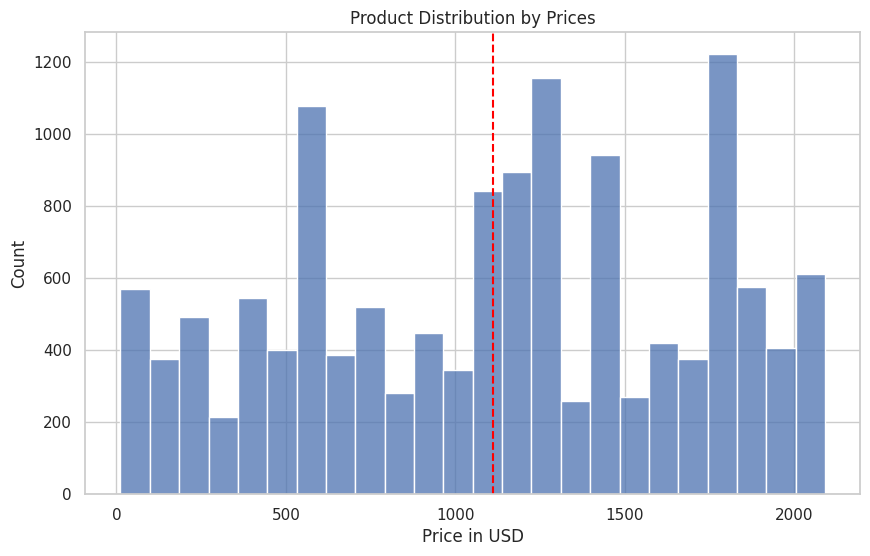

Mean:  1110.1365079248606


In [123]:
# Product Distribution by Prices

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(data=MasterClean, x='list_price')
plt.title('Product Distribution by Prices')
plt.xlabel('Price in USD')
plt.ylabel('Count')
plt.axvline(MasterClean['list_price'].mean(), color='red', linestyle='--', label='Mean')
plt.show()

print('Mean: ', MasterClean['list_price'].mean())

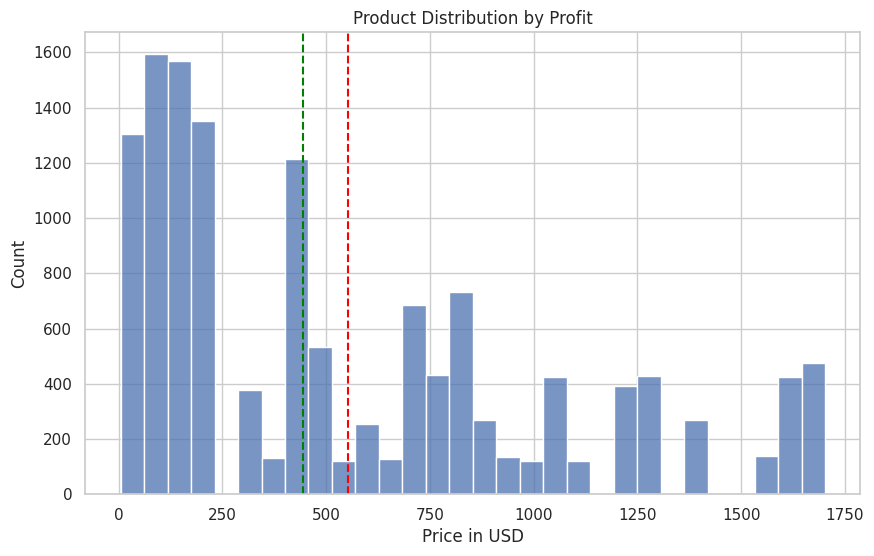

Mean:  552.2205679483417
Median:  445.2099999999999


In [124]:
# Product Distribution by Profit

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(data=MasterClean, x='profit')
plt.title('Product Distribution by Profit')
plt.xlabel('Price in USD')
plt.ylabel('Count')
plt.axvline(MasterClean['profit'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(MasterClean['profit'].median(), color='green', linestyle='--', label='Median')
plt.show()

print('Mean: ', MasterClean['profit'].mean())
print('Median: ', MasterClean['profit'].median())

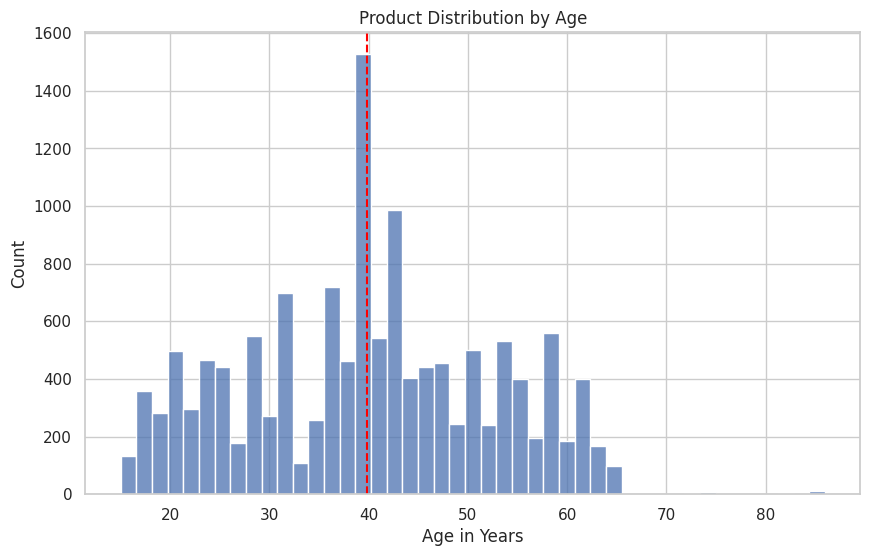

Mean:  39.8009245670678


In [125]:
# Product Distribution by age

import matplotlib.pyplot as plt
import seaborn as sns

# Convert customer_age to int64 instead of Int64
MasterClean['customer_age'] = MasterClean['customer_age'].astype('int64')

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(data=MasterClean, x='customer_age')
plt.title('Product Distribution by Age')
plt.xlabel('Age in Years')
plt.ylabel('Count')
plt.axvline(MasterClean['customer_age'].mean(), color='red', linestyle='--', label='Mean')
plt.show()

print('Mean: ', MasterClean['customer_age'].mean())


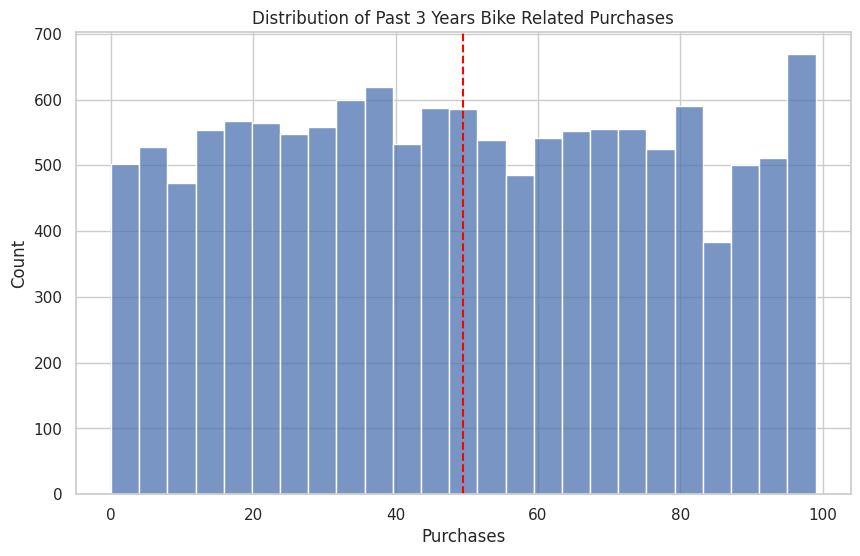

Mean:  49.495450542999706


In [126]:
# Product Distribution by age

import matplotlib.pyplot as plt
import seaborn as sns

# Convert customer_age to int64 instead of Int64
MasterClean['past_3_years_bike_related_purchases'] = MasterClean['past_3_years_bike_related_purchases'].astype('int64')

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(data=MasterClean, x='past_3_years_bike_related_purchases')
plt.title('Distribution of Past 3 Years Bike Related Purchases')
plt.xlabel('Purchases')
plt.ylabel('Count')
plt.axvline(MasterClean['past_3_years_bike_related_purchases'].mean(), color='red', linestyle='--', label='Mean')
plt.show()

print('Mean: ', MasterClean['past_3_years_bike_related_purchases'].mean())

age_group
31-50    52.355445
14-30    25.476959
51-70    21.969475
71-90     0.198122
Name: proportion, dtype: float64


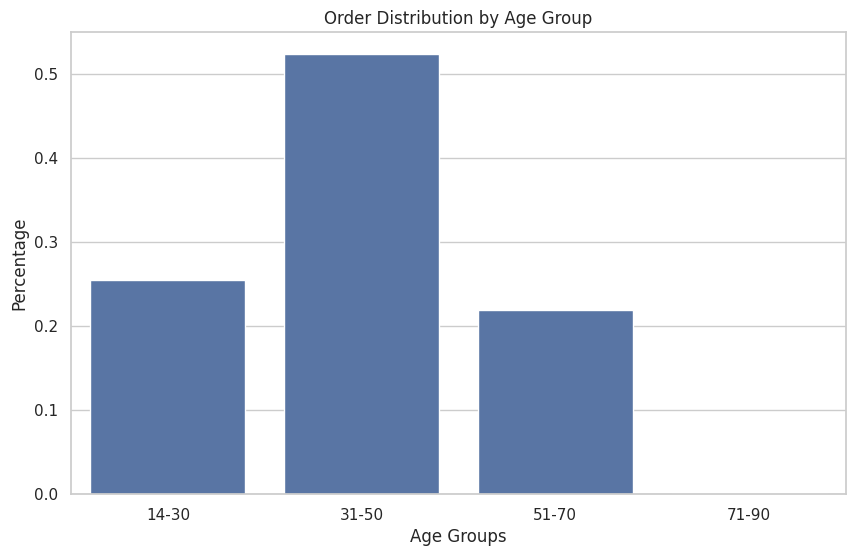

In [127]:
# Order Distribution by Age Group

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
base_color = sns.color_palette()[0]

counts = MasterClean['age_group'].value_counts(normalize=True)
sns.barplot(x= counts.index, y=counts.values, color=base_color)
plt.xlabel('Age Groups')
plt.ylabel('Percentage')
print(counts * 100)

plt.title('Order Distribution by Age Group')
plt.show()

/tmp/ipykernel_21402/3743981089.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



  age_group      profit
0     14-30  1916582.54
1     31-50  3944529.54
2     51-70  1648972.98
3     71-90    15576.84


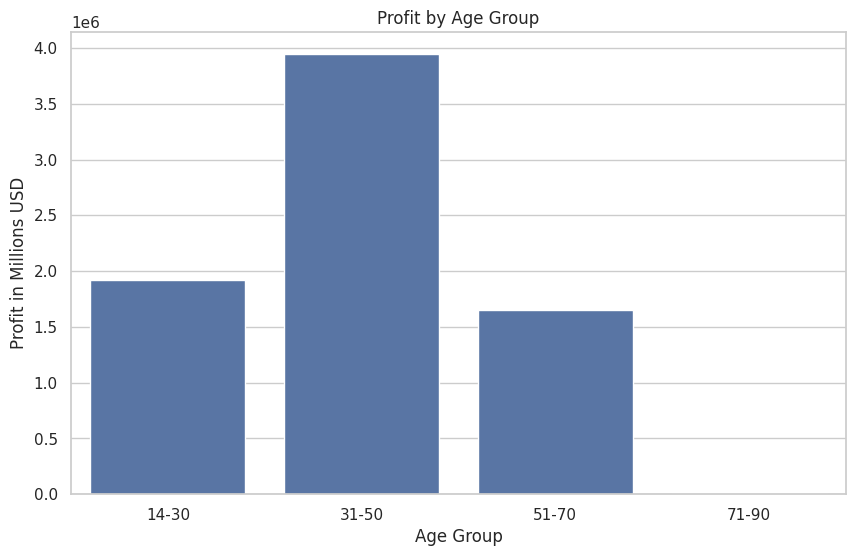

In [128]:
# Profit Distribution by Age Group

import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(10, 6))
base_color = sns.color_palette()[0]
profit_by_age = MasterClean.groupby('age_group')['profit'].sum().reset_index()
sns.barplot(x='age_group', y='profit', data=profit_by_age, color=base_color)

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Profit in Millions USD')
plt.title('Profit by Age Group')

print(profit_by_age.head())

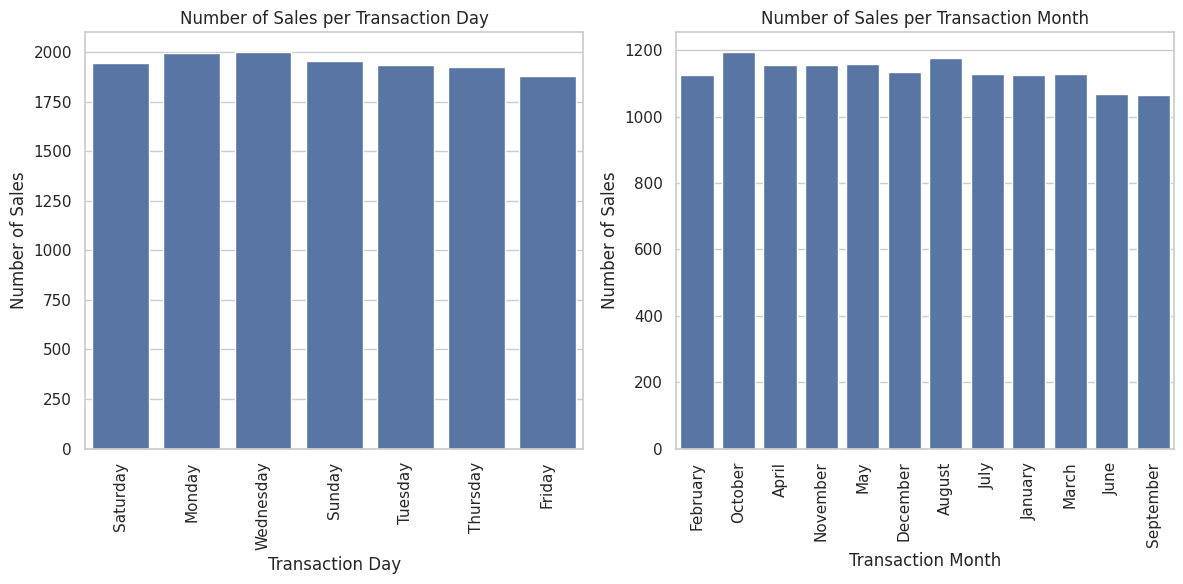

In [129]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

# Bar plot for transaction day
plt.subplot(1, 2, 1)  # Subplot 1
sns.countplot(data=MasterClean, x='transaction_day', color=base_color)
plt.title('Number of Sales per Transaction Day')
plt.xticks(rotation=90)
plt.xlabel('Transaction Day')
plt.ylabel('Number of Sales')

# Bar plot for transaction month
plt.subplot(1, 2, 2)  # Subplot 2
sns.countplot(data=MasterClean, x='transaction_month', color=base_color)
plt.title('Number of Sales per Transaction Month')
plt.xlabel('Transaction Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

wealth_segment
Mass Customer        49.713824
High Net Worth       25.447608
Affluent Customer    24.838568
Name: proportion, dtype: float64


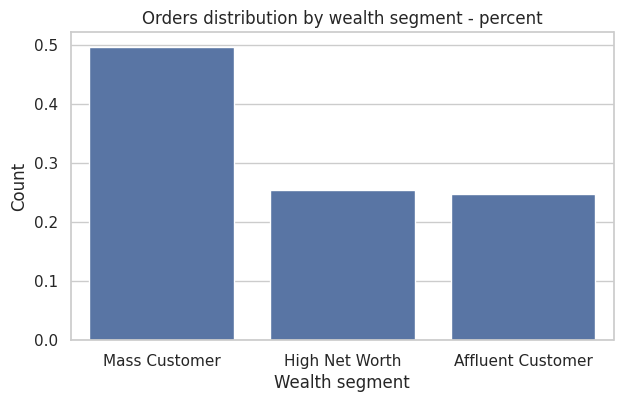

In [130]:
#Orders distribution by wealth segment
plt.figure(figsize = (7,4), dpi = 100)

counts = MasterClean['wealth_segment'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values, color=base_color)
plt.xlabel('Wealth segment')
plt.ylabel('Count')
print(counts * 100)

plt.title("Orders distribution by wealth segment - percent")
plt.show()

state
NSW    52.839742
VIC    25.036689
QLD    22.050191
ACT     0.073378
Name: proportion, dtype: float64


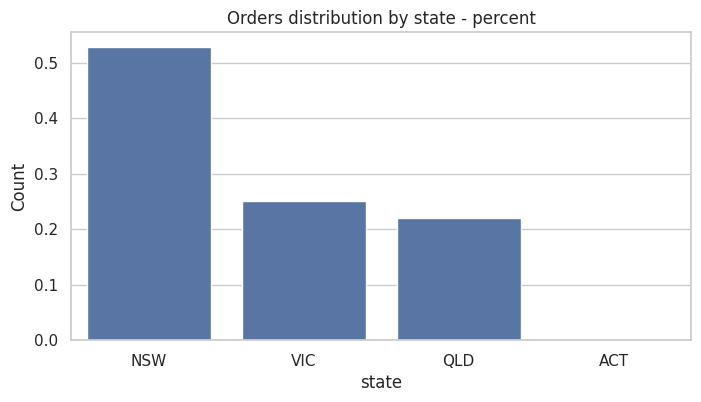

In [131]:
# Orders distribution by state
plt.figure(figsize = (8,4), dpi = 100)
counts = MasterClean['state'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values, color=base_color)
plt.xlabel('state')
plt.ylabel('Count')
print(counts * 100)

plt.title("Orders distribution by state - percent")
plt.show()

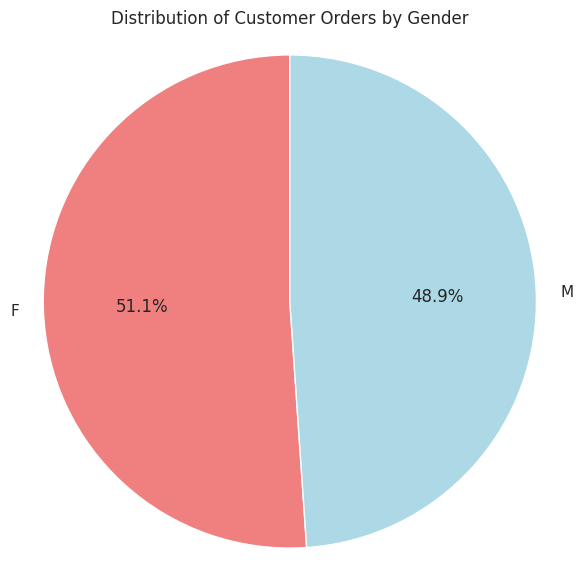

In [132]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7), dpi=100)

counts = MasterClean['gender'].value_counts(normalize=True)
labels = counts.index
sizes = counts.values
colors = ['lightcoral', 'lightblue']  # You can customize the colors here

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.title("Distribution of Customer Orders by Gender")
plt.show()

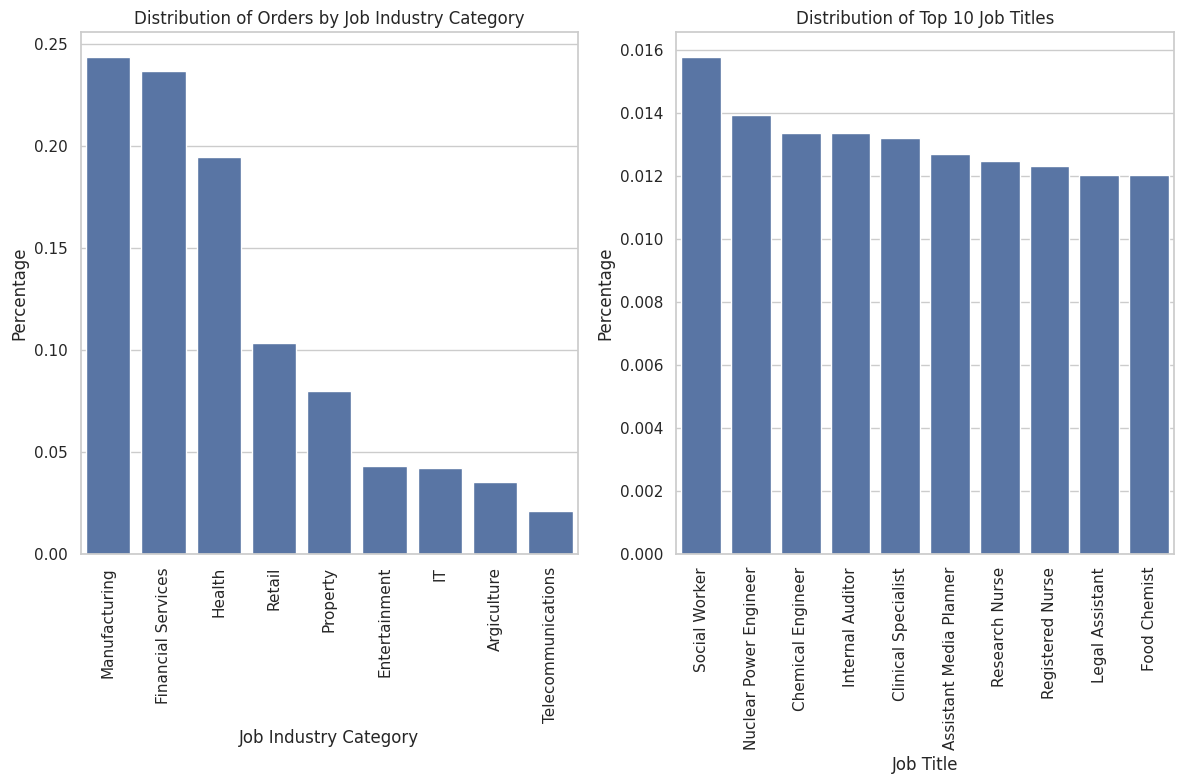

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 8))

# Plotting the distribution of orders by job industry category
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
counts_industry = MasterClean['job_industry_category'].value_counts(normalize=True)
sns.barplot(x=counts_industry.index, y=counts_industry.values, color='b')
plt.xlabel('Job Industry Category')
plt.ylabel('Percentage')
plt.xticks(rotation=90)  # Rotate x-axis labels to 90 degrees
plt.title("Distribution of Orders by Job Industry Category")

# Plotting the distribution of top 10 job titles
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
top_10_titles = MasterClean['job_title'].value_counts(normalize=True).head(10)
sns.barplot(x=top_10_titles.index, y=top_10_titles.values, color='b')
plt.xlabel('Job Title')
plt.ylabel('Percentage')
plt.xticks(rotation=90)  # Rotate x-axis labels to 90 degrees
plt.title("Distribution of Top 10 Job Titles")

plt.tight_layout()  # To prevent overlapping labels and titles
plt.show()

## Bivariate Analysis
In this section we will investigate pair of variables and check if there is any relationship between them.

### Highlights from the Bivariate Analysis
- More of women who own a car buy bikes, and more of men who do not own a car buy bikes
- NSW has the highest number of bike buyers and more Female buyers than male buyers
- More women buy bikes online than men
- Most profitable brand is WeareA2B

These are usually best left to dashboards since it requires too much code to plot in pandas.

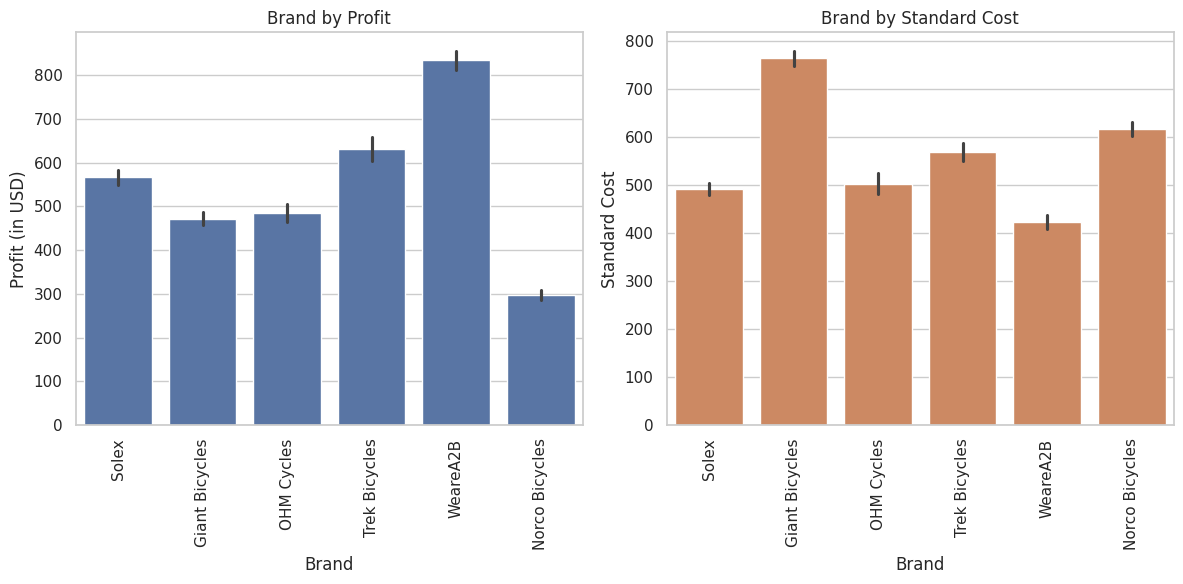

In [134]:
# Brand by Profit and Standard Cost

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))

# First subplot - Profit by Brand
plt.subplot(1, 2, 1)
sns.barplot(data=MasterClean, x="brand", y='profit', color=sns.color_palette()[0])
plt.xlabel('Brand')
plt.ylabel('Profit (in USD)')
plt.xticks(rotation=90)
plt.title("Brand by Profit")

# Second subplot - Standard Cost by Brand
plt.subplot(1, 2, 2)
sns.barplot(data=MasterClean, x="brand", y='standard_cost', color=sns.color_palette()[1])
plt.xlabel('Brand')
plt.ylabel('Standard Cost')
plt.xticks(rotation=90)
plt.title("Brand by Standard Cost")

plt.tight_layout()
plt.show()

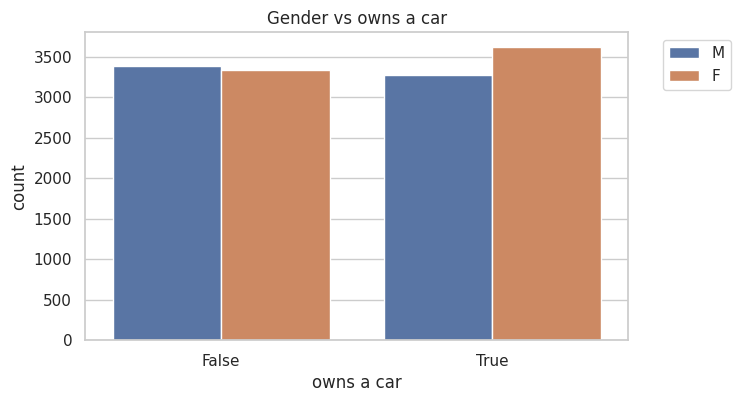

In [135]:
#Gender vs owns a car

plt.figure(figsize = (7,4), dpi = 100)

sns.countplot(data = MasterClean, x = "owns_car",hue='gender')
plt.xlabel('owns a car');
plt.ylabel('count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Gender vs owns a car")

plt.show()

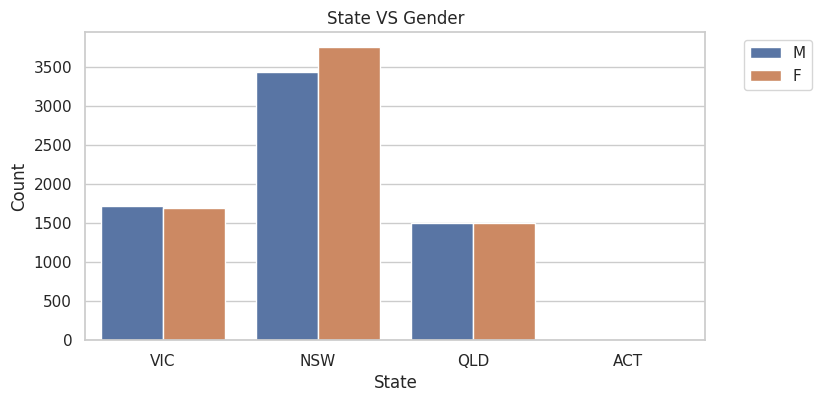

In [136]:
#State vs Gender

plt.figure(figsize = (8,4), dpi = 100)

sns.countplot(data = MasterClean, x = "state",hue='gender')
plt.xlabel('State');
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("State VS Gender")

plt.show()

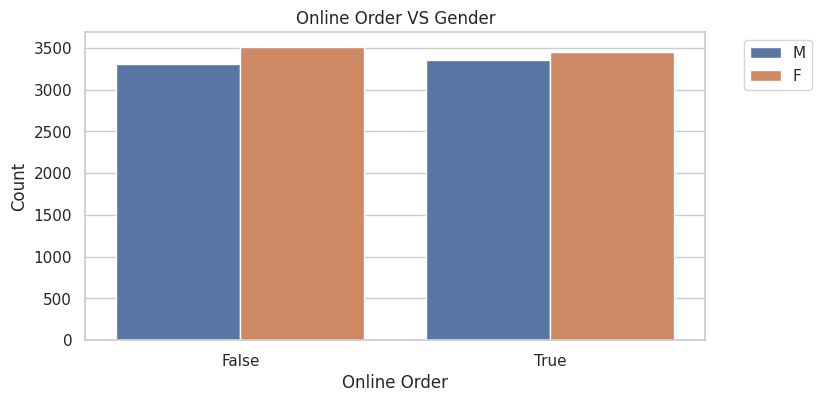

In [137]:
#State vs Gender

plt.figure(figsize = (8,4), dpi = 100)

sns.countplot(data = MasterClean, x = "online_order",hue='gender')
plt.xlabel('Online Order');
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Online Order VS Gender")

plt.show()

/tmp/ipykernel_21402/1747977723.py:21: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_21402/1747977723.py:33: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



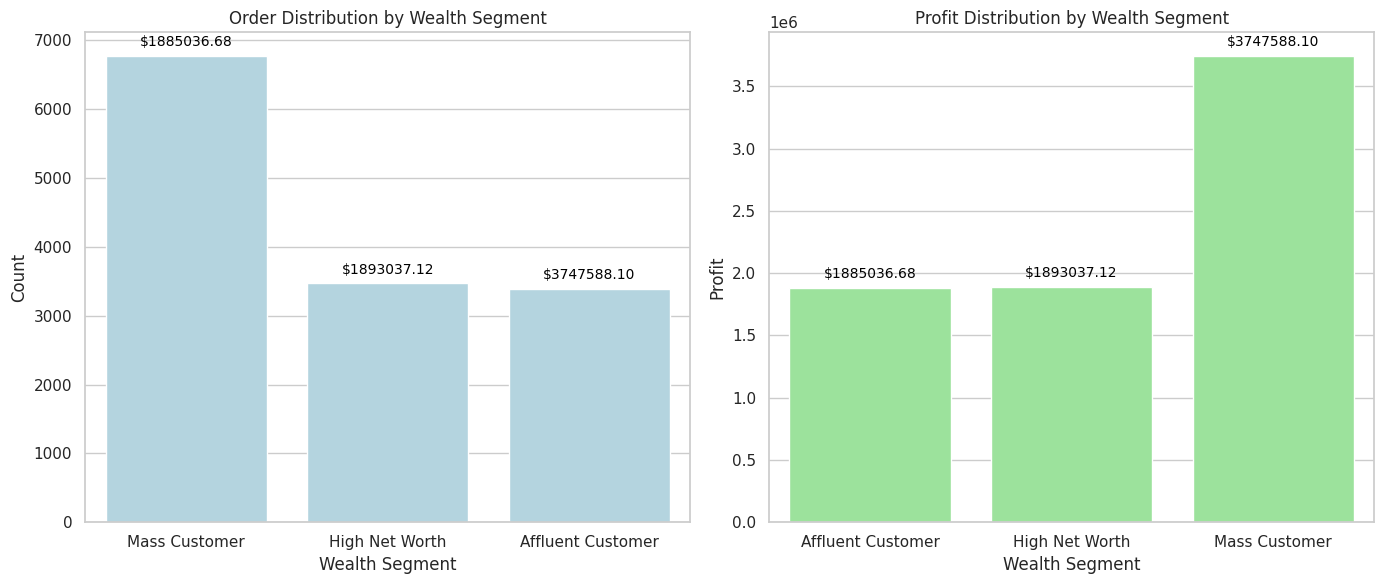

In [138]:
# Wealth Segment Percentage and Profits

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), dpi=100)

# Calculate the order count and profit per wealth segment
counts = MasterClean['wealth_segment'].value_counts()
profits = MasterClean.groupby('wealth_segment')['profit'].sum()

# Normalize the counts to percentages
counts_percent = (counts / counts.sum()) * 100

# Create a bar plot for order distribution
sns.barplot(x=counts_percent.index, y=counts.values, color='lightblue', ax=ax1)
ax1.set_xlabel('Wealth Segment')
ax1.set_ylabel('Count')
ax1.set_title("Order Distribution by Wealth Segment")

# Add profit labels to the bars in the order distribution plot
for i, p in enumerate(ax1.patches):
    ax1.annotate(f'${profits[i]:.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

# Create a bar plot for profit distribution
sns.barplot(x=profits.index, y=profits.values, color='lightgreen', ax=ax2)
ax2.set_xlabel('Wealth Segment')
ax2.set_ylabel('Profit')
ax2.set_title("Profit Distribution by Wealth Segment")

# Add profit labels to the bars in the profit distribution plot
for i, p in enumerate(ax2.patches):
    ax2.annotate(f'${profits[i]:.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

## Multivariate Analysis
In this section we will use correlation matrix to find the correlation between the variables.
Nothing of what we already don't know.

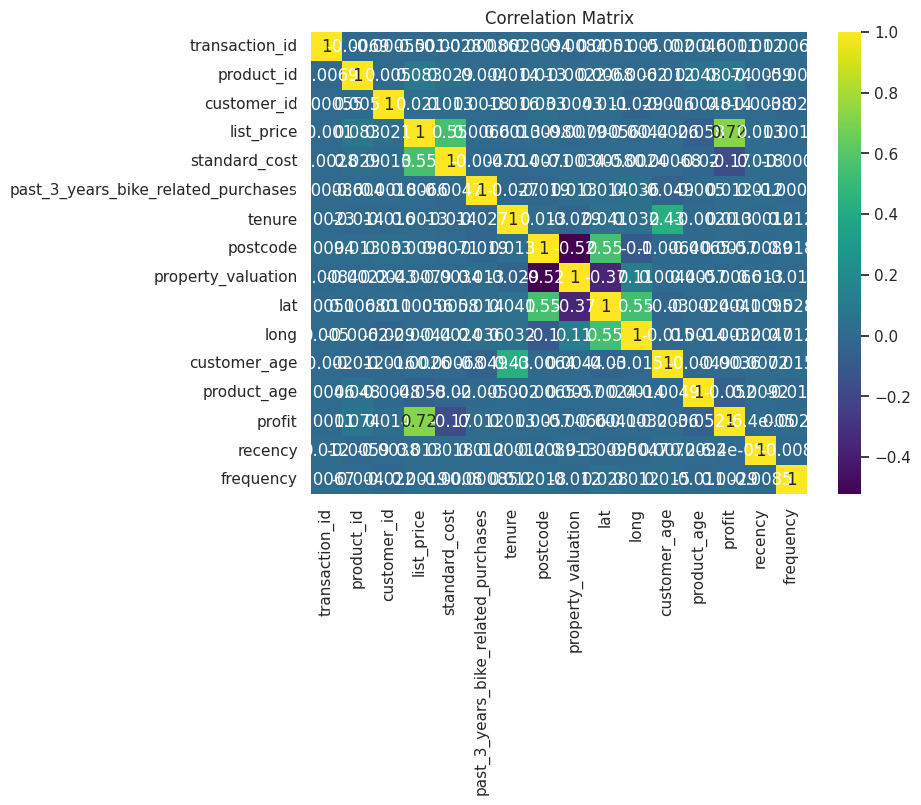

In [139]:
# Drop non-numeric columns or encode them properly
numeric_columns = MasterClean.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create the correlation matrix heatmap
plt.figure(figsize=(8,6), dpi=100)
sns.heatmap(correlation_matrix, cmap="viridis", annot=True)
plt.title("Correlation Matrix")
plt.xticks(rotation=90)
plt.show()

# Task 2 : RFM Analysis
RFM stands for Recency, Frequency and Monetary Value, it is a customer segmentation technique that uses past purchase behavior to divide customers into groups.
This will include the following steps:
- Calculating the `recency` column i.e the number of days since the last purchase
- Calculating the `frequency` column i.e the number of purchases made by a unique customer
- Calculating the `monetary` column i.e the total amount of money spent by a unique customer
- Making the `RFM` dataframe by merging the three columns

Usually we would calculate an RFM score which is also fairly easy to do, but we will be using K-Means clustering to make customer segments instead.
We will be using standard scaler and elbow method to find the optimal number of clusters.

### Creating the RFM Table
- Since we already have the `recency`, `frequency` and `profit` columns, we can make the RFM table by merging them.
- We will later map them to the master dataframe


In [140]:
# Generating the RFM Table
RfmTable = Postcoded.groupby("customer_id").agg(
    {
        "recency": lambda x: x.min(),
        "frequency": lambda x: x.count(),
        "profit": lambda x: x.sum(),
    }
)

RfmTable.rename(
    columns={
        "recency": "recency",
        "frequency": "frequency",
        "profit": "monetary",
    },
    inplace=True,
)

RfmTable.head()

,recency,frequency,monetary
customer_id,,,
1,9,11,3018.09
2,130,3,2226.26
4,197,2,220.57
5,18,6,2394.94
6,66,5,3946.55


### Finding the Optimal Number of Clusters
- We wrote a function to scale the features (using standard scaler)
- We wrote a function to fit the KMeans algorithm on the scaled features and return the model as well as the predictions
- Make sure to run this only on the clean rfm dataframe

The elbow methods shows that the optimal number of clusters is 3, so we will classify each customer into one of these clusters.

In [141]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def plot_elbow_method(df):
    scaler = StandardScaler()
    scaled = scaler.fit_transform(df)

    inertia = []
    for i in np.arange(1, 11):
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=1) # n_init is the number of times the K-mean algorithm will run with different centroid seeds (default=10), explicityly set to 10 to suppress warning
        kmeans.fit(scaled)
        inertia.append(kmeans.inertia_)

    plt.plot(np.arange(1, 11), inertia, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()
    
    return scaled

# Example usage:
# Assuming you have a DataFrame called 'rfm_table', you can call the function like this:
# plot_elbow_method(rfm_table)

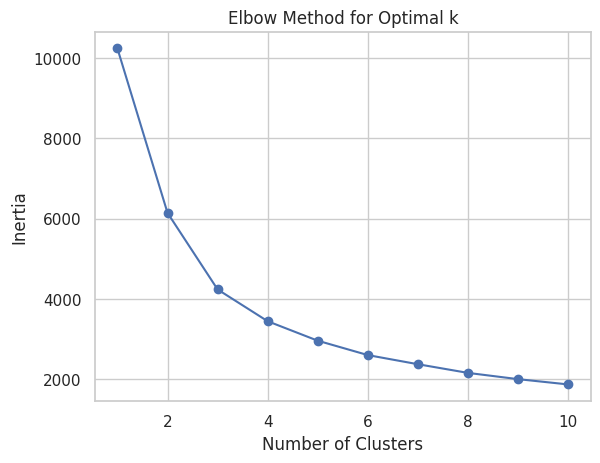

In [142]:
scaled_array = plot_elbow_method(RfmTable)

### Classifying the Customers
Now that we have the clusters, we will analyse the clusters and see which cluster has the highest profit, and then we will map the customer IDs to the clusters and then predict the high value customers.

- Gold customers are comparatively less in number but have the highest profit
- Silver customers are the most in number but struggle to keep up with the gold customers
- Bronze customers are the least in number, have the best profit to customer ratio but have the lowest overall profit
- Also Bronze customers very rarely buy any products

In [143]:
# Use k-means to cluster the RFM table

kmeans = KMeans(n_clusters=3, n_init=10, random_state=10)
kmeans.fit(scaled_array)

# +1 to make the clusters start from 1 instead of 0
RfmTable['cluster'] = kmeans.labels_+1
RfmTable.head()

,recency,frequency,monetary,cluster
customer_id,,,,
1,9,11,3018.09,2
2,130,3,2226.26,3
4,197,2,220.57,3
5,18,6,2394.94,1
6,66,5,3946.55,1


In [144]:
# Using a ClusterMap to group clusters by their average RFM values

ClusterMap = RfmTable.groupby("cluster").agg(
    {
        "recency": "mean",
        "frequency": "mean",
        "monetary": "mean",
    }
)
ClusterMap["cluster_size"] = RfmTable.groupby("cluster")["cluster"].count()

# Sorting the ClusterMap by monetary_value in descending order
SortedClusterMap = ClusterMap.sort_values(by="monetary", ascending=False)

# Preparing the customer_category column
# customer_category = ["Platinum","Gold", "Silver", "Bronze"]
customer_category = ["Gold", "Silver", "Bronze"]
SortedClusterMap["customer_category"] = customer_category

CategoryCluster = SortedClusterMap["customer_category"].to_dict()

SortedClusterMap

,recency,frequency,monetary,cluster_size,customer_category
cluster,,,,,
2,40.156137,8.150722,5023.386372,1108,Gold
1,43.959677,4.846198,2312.542056,1736,Silver
3,166.327465,3.642606,1871.216673,568,Bronze


### Visualizing the Clusters
- We will make an interactive cluster plot using plotly and see if we can find any insights.
- We will also use seaborn to make a cluster plot.


In [145]:
# Using Plotly to plot the ClusterMap

import plotly.express as px

# Create an interactive 3D scatter plot
fig = px.scatter_3d(
    RfmTable,
    x='recency',
    y='frequency',
    z='monetary',
    color='cluster',
    size_max=10,
    opacity=0.7,
    labels={'recency': 'Recency', 'frequency': 'Frequency', 'monetary': 'Monetary'},
    title='RFM Clusters - Interactive 3D Scatter Plot'
)

fig.show()

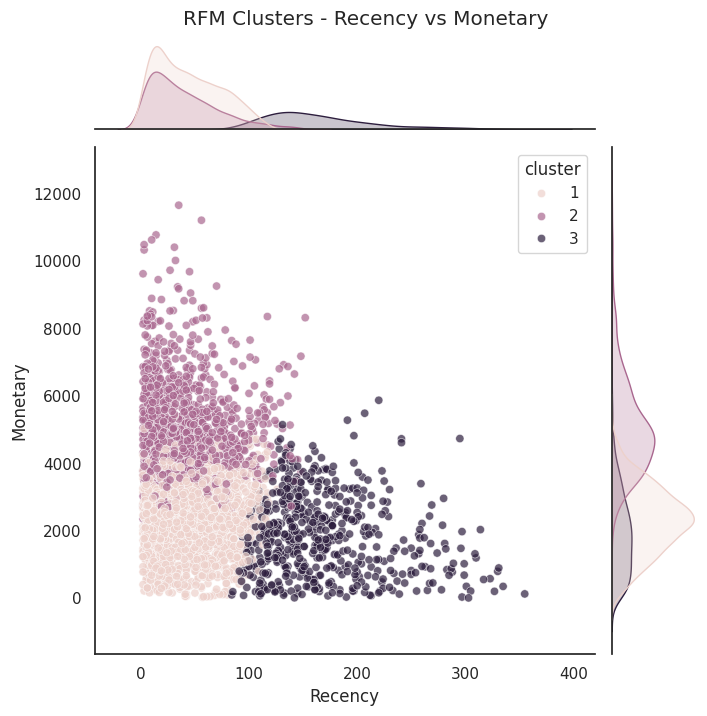

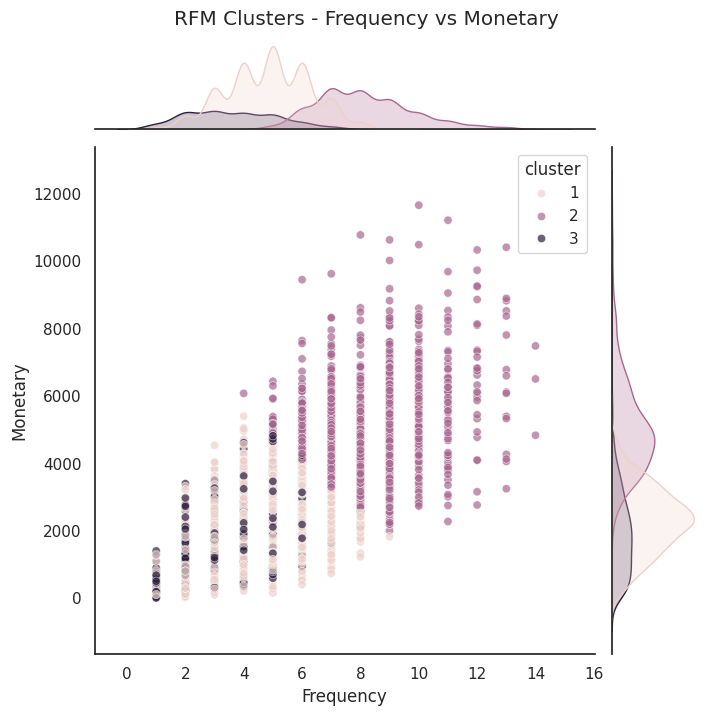

In [146]:
# Using SeaBorn to plot the ClusterMap

import seaborn as sns
import matplotlib.pyplot as plt

# Create a joint plot for 'recency' and 'monetary'
sns.set(style="white")
fig1 = sns.jointplot(
    data=RfmTable,
    x='recency',
    y='monetary',
    hue='cluster',
    alpha=0.7,
    markers=["o", "s", "D"],
    height=7
)
fig1.set_axis_labels('Recency', 'Monetary')
fig1.fig.suptitle('RFM Clusters - Recency vs Monetary', y=1.02)

# Create a joint plot for 'frequency' and 'monetary'
fig2 = sns.jointplot(
    data=RfmTable,
    x='frequency',
    y='monetary',
    hue='cluster',
    alpha=0.7,
    markers=["o", "s", "D"],
    height=7
)
fig2.set_axis_labels('Frequency', 'Monetary')
fig2.fig.suptitle('RFM Clusters - Frequency vs Monetary', y=1.02)

# Display the subplots
plt.show()

### Mapping the Clusters to the Master Dataframe
- This will add two new columns to the master dataframe, `cluster` and `customer_category`

In [147]:
# Mapping the clusters to the customers
Postcoded['cluster'] = Postcoded['customer_id'].map(RfmTable['cluster'])
Postcoded['customer_category'] = Postcoded['cluster'].map(CategoryCluster)

In [148]:
Postcoded.sample(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,country,property_valuation,lat,long,state,customer_age,product_age,age_group,profit,recency,frequency,transaction_day,transaction_week,transaction_month,cluster,customer_category
14688,7102,79,1316,2017-11-28,False,True,Solex,Touring,medium,large,2083.94,675.03,1999-05-25 10:28:51.930308,Steven,Castellaccio,M,79,1990-03-06,Recruiter,Retail,High Net Worth,False,True,18,482 Bartelt Junction,4280,Australia,7,-27.810402,152.948421,QLD,27,18.0,14-30,1408.91,34,5,Tuesday,48,November,1,Silver
14067,18591,68,2151,2017-03-10,True,True,OHM Cycles,Standard,medium,medium,1636.90,44.71,2004-09-03 10:28:51.930308,Herrick,Gammett,M,9,1986-10-23,NaN,Entertainment,Affluent Customer,False,False,6,124 Fulton Crossing,4680,Australia,3,-23.446826,151.917285,QLD,31,13.0,31-50,1592.19,297,7,Friday,10,March,2,Gold
5013,16529,34,1282,2017-09-21,True,True,Norco Bicycles,Road,high,large,774.53,464.72,2005-03-30 10:28:51.930308,Garald,Pidler,M,99,1980-11-15,Programmer Analyst III,Entertainment,Affluent Customer,False,True,14,791 Elgar Trail,4340,Australia,5,-27.803453,152.472702,QLD,37,12.0,31-50,309.81,102,8,Thursday,38,September,2,Gold
11616,12424,72,752,2017-03-02,True,True,OHM Cycles,Standard,medium,medium,912.52,141.40,2009-11-01 10:28:51.930308,Kalil,Palombi,M,13,1961-06-27,Speech Pathologist,Financial Services,High Net Worth,False,False,12,62215 Delaware Plaza,4118,Australia,3,-27.673806,153.027323,QLD,56,8.0,51-70,771.12,305,8,Thursday,09,March,2,Gold
8684,9498,34,2456,2017-07-12,True,True,Norco Bicycles,Road,high,large,774.53,464.72,1997-04-01 10:28:51.930308,Reidar,Pullin,M,9,1991-05-29,Sales Associate,NaN,Mass Customer,False,False,10,6568 Northridge Pass,3029,Australia,6,-37.837165,144.705831,VIC,26,20.0,14-30,309.81,173,6,Wednesday,28,July,3,Bronze


# Task 2 : Proximity Analysis
In this section we will only focus on geopandas and try to make customer segmentation maps.
- We will also try to geocode the customer adresses to get another lat and long column `geo_lat` and `geo_long`